# Bike Rental Data
This project analyzes bike trip data from the San Francisco Bay area. The original dataset comes from **TBD** and includes the following columns:
- `tripduration` (int64) - length of rental in seconds
- `starttime` (object) - rental start time
- `stoptime` (object) - rental stop time
- `start station id` (int64) - id of start station 
- `start station name` (object) - name of start station
- `start station latitude` (float64) - latitude of start station
- `start station longitude` (float64) - longitude of start station
- `end station id` (int64) - id of end station
- `end station name` (object) - name of end station
- `end station latitude` (float64) - latitude of end station
- `end station longitude` (float64) - longitude of end station
- `bikeid` (int64) - id of rental bike
- `usertype` (object) - type of user ('Subscriber' or 'Customer')
- `birth year` (object) - birth year of renter (if known)
- `gender` (int64) - gender of renter (if known)

In this exploratory data analysis, I am interested in discovering the following:
1. Are there any behavioral differences between user types? And if so, what are they?
    1. Rental count / duration, by day of week or by hour of day
    2. Distance traveled or rental duration
    3. 
2. Are there any significant differences in user types along the lines of gender or age?
    1. 
3. Which stations are most popular for rentals overall? By day of week? By hour of day? And does this vary by user type?

4. Station popularity
    1. Which stations are most popular overall? By user type? By day of week? By hour of day?
    2. Which station is most popular for starting a trip? ending a trip?
    3. Which trips are most popular (start station to end station) and how does this vary across our key dimensions (i.e., user type, day of week, hour of day)


Other:
1. Look for fraud


## Import Libraries

In [125]:
# Import packages
import pandas as pd
import numpy as np
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import seaborn as sns
sns.set_style("whitegrid")
sns.set(color_codes=True)

import folium

# Set display option for floats in Pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Read in & Preview the Data

In [2]:
# Read in the data and review
df = pd.read_csv('../data/bike_rental_data.csv')
print(df.shape)

(1037712, 15)


In [3]:
df.head(1)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,326,2013-10-01 00:01:08,2013-10-01 00:06:34,239,Willoughby St & Fleet St,40.69,-73.98,366,Clinton Ave & Myrtle Ave,40.69,-73.97,16052,Subscriber,1982,1


## Data Review and Cleanup

### Check for Missing Values

In [4]:
# Check for missing values
df.isna().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

### Rename Columns

In [5]:
# Rename columns to remove spaces
cols = []
for col in df.columns.to_list():
    col = col.replace(' ','_')
    cols.append(col)
df.columns = cols
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bikeid', 'usertype',
       'birth_year', 'gender'],
      dtype='object')

### Review & Cleanup Duration Data
TBD

In [6]:
# Create a new column for duration in minutes and round to nearest minute
df['tripduration_min'] = round((df.tripduration / 60),0).astype(int)

In [7]:
# Review duration statistics
mean = round(np.mean(df.tripduration_min),0).astype(int)
median = round(np.median(df.tripduration_min),0).astype(int)
mode = stats.mode(df.tripduration_min)[0][0]
print ("Trip Duration:")
print("Mean ~ " + str(mean) + " minutes")
print("Median ~ " + str(median) + " minutes")
print("Mode ~ " + str(mode) + " minutes")

Trip Duration:
Mean ~ 14 minutes
Median ~ 10 minutes
Mode ~ 6 minutes


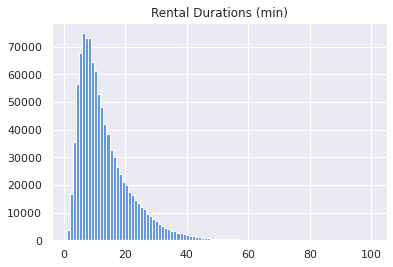

In [8]:
# Plot duration on a histogram
plt.hist(df.tripduration_min, bins=100, range=(1,100), color='cornflowerblue')
plt.title('Rental Durations (min)');

In [9]:
df.tripduration_min.describe()

count   1037712.00
mean         13.76
std          33.34
min           1.00
25%           7.00
50%          10.00
75%          17.00
max       20991.00
Name: tripduration_min, dtype: float64

In [10]:
df[df.tripduration_min > 50].tripduration_min.count()

10763

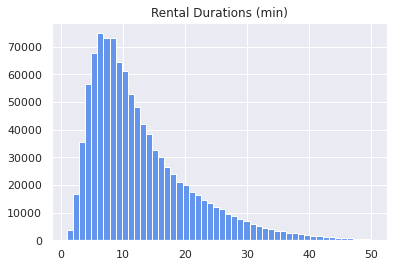

In [11]:
# Remove outlier trips with above 50 min
df = df[df.tripduration_min <= 50]

# And now to plot duration on a histogram using the adjusted df
plt.hist(df.tripduration_min, bins=50, range=(1,50), color='cornflowerblue')
plt.title('Rental Durations (min)');

In [12]:
# And to review our duration stats again
df.tripduration_min.describe()

count   1026949.00
mean         12.59
std           8.34
min           1.00
25%           7.00
50%          10.00
75%          16.00
max          50.00
Name: tripduration_min, dtype: float64

In [13]:
1026949/1037712*100

98.96281434540604

When we remove the outlier trips, we can see that the average trip is just over 12 min. This required removing about 1% of the data...1026949 rows vs. 1037712 rows.

### Review Gender Column Data

In [14]:
# Review gender column data
df.groupby(['usertype', 'gender']).usertype.count()

usertype    gender
Customer    0          90974
            1              1
Subscriber  0             52
            1         711435
            2         224487
Name: usertype, dtype: int64

### Review Birth Year Data

In [15]:
# Review birth year column data
df.groupby(['usertype', 'birth_year']).usertype.count()

usertype    birth_year
Customer    1995              1
            \N            90974
Subscriber  1899             54
            1900            202
            1901             36
                          ...  
            1993           7685
            1994           4552
            1995           2442
            1996           1372
            1997           1005
Name: usertype, Length: 83, dtype: int64

### Review Date Info
TBD

In [17]:
# Convert start_date and end_date to datetime format
df.starttime = pd.to_datetime(df.starttime, infer_datetime_format=True)
df.stoptime = pd.to_datetime(df.stoptime, infer_datetime_format=True)

# Create new columns for hour of rental and day of week
df["starthour"] = df.starttime.dt.hour
df["startdow"] = df.starttime.dt.dayofweek

# Create new column for binary designation of weekend days
df["is_weekend"] = 0
df.loc[df['startdow'] >= 5, 'is_weekend'] = 1

# Create user friendly version of startdow column
days_dict = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['day'] = df.startdow.map(days_dict)

## Behavior Analysis
TBD - description of what we want to analyze in terms of customer behavior

### Rental Count by Hour

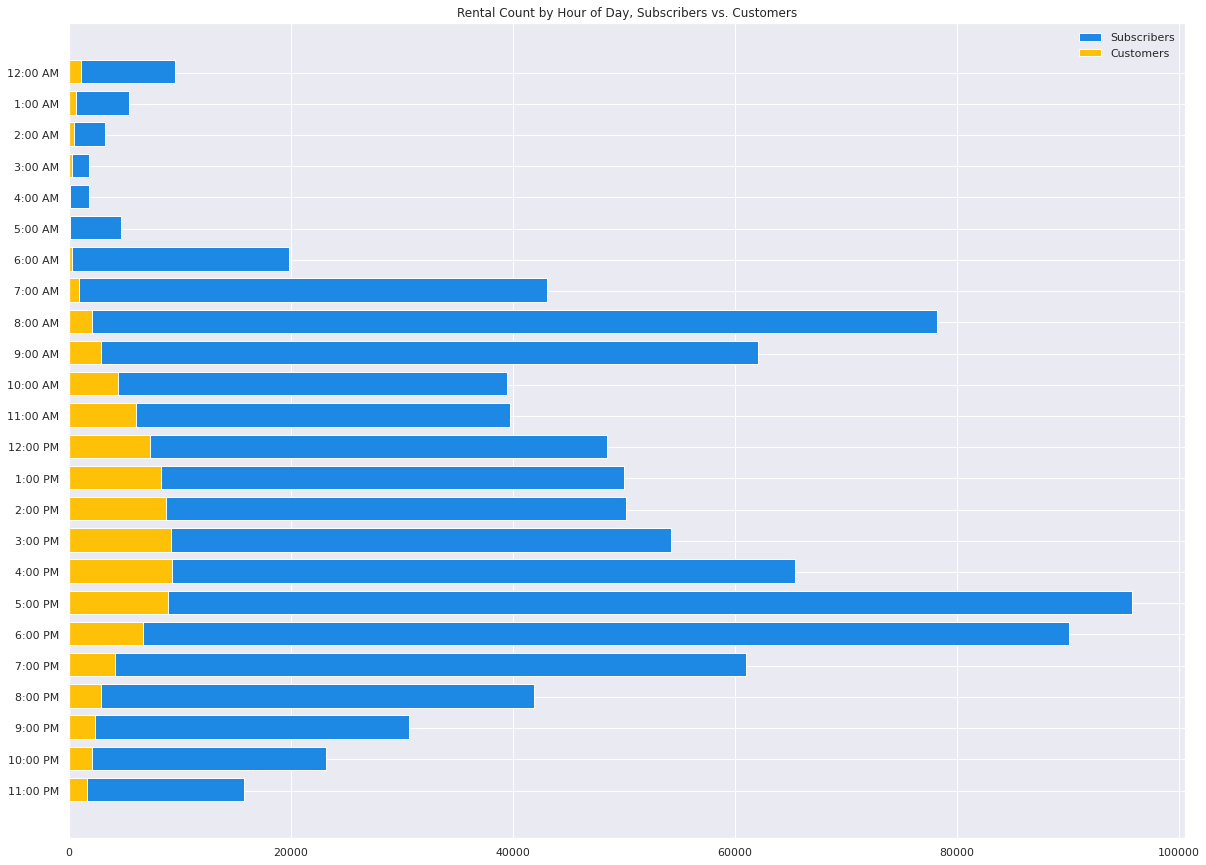

In [66]:
# Plotted as a bar chart
# x values are the unique hours of the day
temp_df = df.sort_values(by=['starthour'], ascending=True)
hours = temp_df.starthour.unique().tolist()

# y values are the sum of the count for each hour of the day
sub_rentals_per_hour = temp_df[temp_df.usertype == 'Subscriber'].groupby(['starthour']).starthour.count()
y_values_sub = sub_rentals_per_hour.tolist()
cus_rentals_per_hour = temp_df[temp_df.usertype == 'Customer'].groupby(['starthour']).starthour.count()
y_values_cus = cus_rentals_per_hour.tolist()

# Plot rentals based on the hour of the day
width = 0.75 # the width of the bars 
ind = np.arange(len(sub_rentals_per_hour))  # the x locations for the groups
plt.figure(figsize=(20,15))

# Add bars and avg line for subscribers and customers
plt.barh(ind, y_values_sub, width, color='#1E88E5', label='Subscribers')
plt.barh(ind, y_values_cus, width, color='#FFC107', label='Customers')
# plt.axvline(sub_rentals_per_hour.mean(), color='#1E88E5', linestyle='dashed',\
#             linewidth=2, label='Subscribers, Avg per hour')
# plt.axvline(cus_rentals_per_hour.mean(), color='#FFC107', linestyle='dashed',\
#             linewidth=2, label='Customers, Avg per hour')

# Generate Labels & Apply Formatting
ylabels = ['12:00 AM', '1:00 AM', '2:00 AM', '3:00 AM', '4:00 AM', '5:00 AM', '6:00 AM', '7:00 AM',\
           '8:00 AM', '9:00 AM', '10:00 AM', '11:00 AM', '12:00 PM', '1:00 PM', '2:00 PM', '3:00 PM',\
           '4:00 PM', '5:00 PM', '6:00 PM', '7:00 PM', '8:00 PM', '9:00 PM', '10:00 PM', '11:00 PM']
plt.yticks(ind+width/24, labels=ylabels)
plt.title('Rental Count by Hour of Day, Subscribers vs. Customers')     
plt.gca().invert_yaxis() # account for default reversal of the y axis values
plt.legend(loc='upper right');

plt.show()

#### Summary
Subscriber rentals tend to spike around peak commute hours (7:00 AM - 10:00 AM and 4:00 PM - 7:00 PM) while Customer rentals follow more of a normal distribution throughout the day plateauing between the hours of 1:00 PM and 6:00 PM. 

In [58]:
# # Similar plot in Seaborn
# temp_df_hour = df.groupby(["starthour","usertype"]).usertype.count().reset_index(name="count")
# g = sns.catplot(x="starthour", y="count", hue="usertype", data=temp_df_hour, height=6, aspect=2,\
#                 kind="bar", palette="muted", legend_out=True)
# g.despine(left=True)
# g.set(xlabel='Hour of Day (24hr)', ylabel=None,\
#       title="Total Rental Count by Hour - Customer vs. Subscriber")
# g._legend.set_title("User Type");

In [22]:
# # Heatmap
# temp_df_hour = temp_df_hour.pivot_table(index='starthour', values='count', columns='usertype')
# sns.heatmap(temp_df_hour, cmap='coolwarm')

### Rental Count by Day of Week

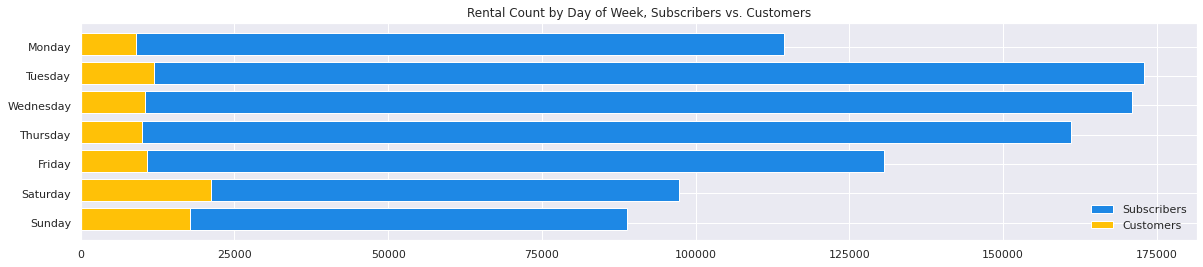

In [68]:
# Plotted as a bar chart
# x values are the unique hours of the day
temp_df_days = df.sort_values(by=['startdow'], ascending=True)
days = temp_df_days.startdow.unique().tolist()

# y values are the sum of the count for each day of the week
sub_rentals_per_day = temp_df_days[temp_df_days.usertype == 'Subscriber'].groupby(['startdow']).startdow.count()
y_values_sub = sub_rentals_per_day.tolist()
cus_rentals_per_day = temp_df_days[temp_df_days.usertype == 'Customer'].groupby(['startdow']).startdow.count()
y_values_cus = cus_rentals_per_day.tolist()

# Plot rentals based on the day of the week
width = 0.75 # the width of the bars 
ind = np.arange(len(sub_rentals_per_day))  # the x locations for the groups
plt.figure(figsize=(20,4))

# Add bars for subscribers and customers
plt.barh(ind, y_values_sub, width, color='#1E88E5', label='Subscribers')
plt.barh(ind, y_values_cus, width, color='#FFC107', label='Customers')

# Generate Labels & Apply Formatting
ylabels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.yticks(ind+width/7, labels=ylabels)
plt.title('Rental Count by Day of Week, Subscribers vs. Customers')     
plt.gca().invert_yaxis() # account for default reversal of the y axis values
plt.legend(loc='lower right');

plt.show()

#### Summary
Again, we see opposite behavior patterns between subscribers and customers in this view. For subscribers, rental counts are higher on weekdays as compared to weekends. Monday and Friday are not as high as Tuesday through Thursday, but this could likely be attributed to more people taking these days off or working from home.

For customers, we see similar counts Monday through Friday with a peak over the weekend days.

In [69]:
# # Similar view in Seaborn
# temp_df_dow = df.groupby(["startdow","day","usertype"]).usertype.count().reset_index(name="count")
# g = sns.catplot(x="day", y="count", hue="usertype", data=temp_df_dow, height=6, aspect=2, kind="bar",\
#                 palette="muted", legend_out=True)
# g.despine(left=True)
# g.set(xlabel=None, ylabel=None,
#       title="Total Rental Count by Day of Week - Customer vs. Subscriber")
# g._legend.set_title("User Type");

In [70]:
# # SNS Heatmap of rentals by day of week
# temp_df_dow = temp_df_dow.pivot_table(index='day', values='count', columns='usertype')
# sns.heatmap(temp_df_dow, cmap='coolwarm');

## Station Popularity

### Popularity by Total Rental Count

In [76]:
# Look at total station count
print("Total station count: " + str(len(df.start_station_name.unique())))

Total station count: 330


In [79]:
# Top 10 stations based on total rental count
df['count'] = 1
df.pivot_table(index=["start_station_name"], values="count",\
                  aggfunc=np.sum).sort_values("count", ascending=False).reset_index().head(10)

,start_station_name,count
0,8 Ave & W 31 St,11108
1,Pershing Square N,11107
2,E 17 St & Broadway,10541
3,Lafayette St & E 8 St,10404
4,W 20 St & 11 Ave,9717
5,Broadway & E 14 St,9050
6,University Pl & E 14 St,8883
7,West St & Chambers St,7960
8,W 21 St & 6 Ave,7936
9,2 Ave & E 31 St,7879


In [80]:
# Bottom 10 stations based on total rental count
df.pivot_table(index=["start_station_name"], values="count",\
                  aggfunc=np.sum).sort_values("count", ascending=False).reset_index().tail(10)

,start_station_name,count
320,Sands St & Gold St,365
321,Hanover Pl & Livingston St,314
322,Monroe St & Classon Ave,312
323,Myrtle Ave & St Edwards St,292
324,Bedford Ave & S 9th St,290
325,Franklin Ave & Myrtle Ave,272
326,Park Ave & St Edwards St,266
327,7 Ave & Farragut St,215
328,Cadman Plaza E & Red Cross Pl,193
329,Railroad Ave & Kay Ave,96


### Popularity by Average Rental Duration

In [82]:
# Top 10 stations based on total rental duration
df.pivot_table(index=["start_station_name"], values=["count","tripduration_min"],\
                  aggfunc={"count": np.sum,"tripduration_min": np.mean}).\
                  sort_values("tripduration_min", ascending=False).reset_index().head(10)

,start_station_name,count,tripduration_min
0,Central Park S & 6 Ave,3429,21.53
1,Wythe Ave & Metropolitan Ave,1621,20.63
2,State St,2282,20.49
3,Old Fulton St,1203,20.14
4,Dean St & 4 Ave,1553,20.08
5,S 5 Pl & S 4 St,2225,19.72
6,Atlantic Ave & Furman St,991,19.71
7,South St & Whitehall St,1803,19.63
8,South St & Gouverneur Ln,2576,19.24
9,Metropolitan Ave & Bedford Ave,2082,19.07


In [83]:
# Bottom 10 stations based on total rental duration
df.pivot_table(index=["start_station_name"], values=["count","tripduration_min"],\
                  aggfunc={"count": np.sum,"tripduration_min": np.mean}).\
                  sort_values("tripduration_min", ascending=False).reset_index().tail(10)

,start_station_name,count,tripduration_min
320,E 12 St & 3 Ave,4721,10.32
321,Washington Pl & Broadway,4313,10.30
322,Washington Park,791,10.26
323,Lafayette Ave & St James Pl,678,10.07
324,Washington Square E,5955,10.00
325,Cumberland St & Lafayette Ave,906,9.71
326,DeKalb Ave & Hudson Ave,1719,9.69
327,DeKalb Ave & Vanderbilt Ave,959,9.44
328,Adelphi St & Myrtle Ave,1187,9.29
329,Willoughby St & Fleet St,1119,8.28


In [94]:
short_trips = df[df.tripduration_min < 5]
short_trips.shape[0]

112420

In [98]:
short_trips_same_station = short_trips[short_trips.start_station_name == short_trips.end_station_name]
short_trips_same_station.usertype.describe()

count           6629
unique             2
top       Subscriber
freq            5188
Name: usertype, dtype: object

## Subscription Type Analysis

In [99]:
# Determine average duration for subscriber vs. customer
df.pivot_table(index=["usertype"], values=["count","tripduration_min"],\
                  aggfunc={"count": np.sum,"tripduration_min": np.mean}).\
                  sort_values("tripduration_min", ascending=False).reset_index()

,usertype,count,tripduration_min
0,Customer,90975,19.24
1,Subscriber,935974,11.94


### Average Duration - Subscribers vs. Customers

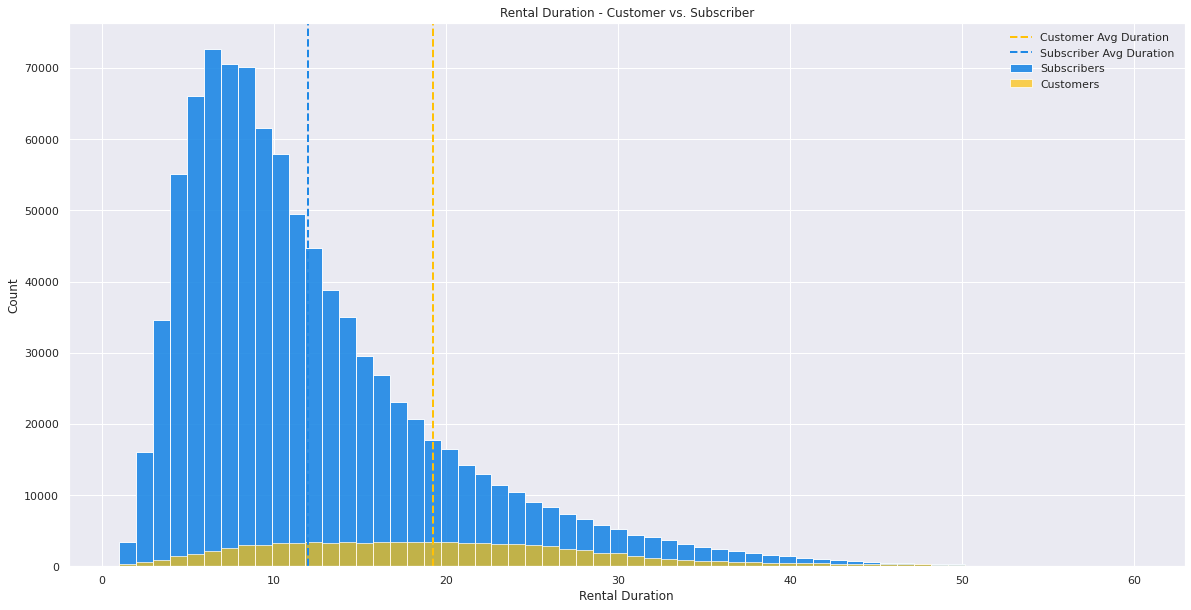

In [102]:
# Plot a histogram of avg rental duration for customers vs. subscribers
x_cus = df[df['usertype'] == 'Customer'].tripduration_min
x_sub = df[df['usertype'] == 'Subscriber'].tripduration_min

plt.figure(figsize=(20,10))

# plot histogram for each type
plt.hist(x_sub, bins=60, range=(1,60), color='#1E88E5', alpha=0.9, label='Subscribers')
plt.hist(x_cus, bins=60, range=(1,60), color='#FFC107', alpha=0.7, label='Customers')

# plot the average for each type
plt.axvline(x_sub.mean(), color='#1E88E5', linestyle='dashed', linewidth=2, label='Subscriber Avg Duration')
plt.axvline(x_cus.mean(), color='#FFC107', linestyle='dashed', linewidth=2, label='Customer Avg Duration')

# Formatting and Labels
plt.xlabel("Rental Duration")
plt.ylabel("Count")
plt.title('Rental Duration - Customer vs. Subscriber')
plt.legend(loc='upper right');

Based on the data for this single month, it looks like we can start to draw some tentative conclusions.

1. Subscribers are much more likely to rent bikes in general (TODO - add avg rental count per day)
2. Customers rent bikes for nearly twice as long on average (19 min as compared to 12 min for subscribers)
3. Subscriber rentals peak on weekdays (in particular Tuesday - Thursday) and Customer rentals peak on weekends.

Assuming subscribers are paying some sort of monthly subscription fee in addition to a per min rate, it would appear that the best way to increase revenue for the program would be to increase the number of subscribers. Although, without exact numbers for the program, this is a tough conclusion to make. 

If subscribers pay a monthly fee that **includes** a specified amount of minutes, this could explain why the average duration is lower for subscribers who may not want to exceed their monthly allocation. In contrast, as a one-off customer, it is likely a bigger decision to rent a bike to begin with and it's reasonable to think that these rentals occur most frequently when a person has a long distance to travel - i.e., a distance so long that they would prefer to ride than walk.

## Time Series Analysis - Rentals Per Day Over Time

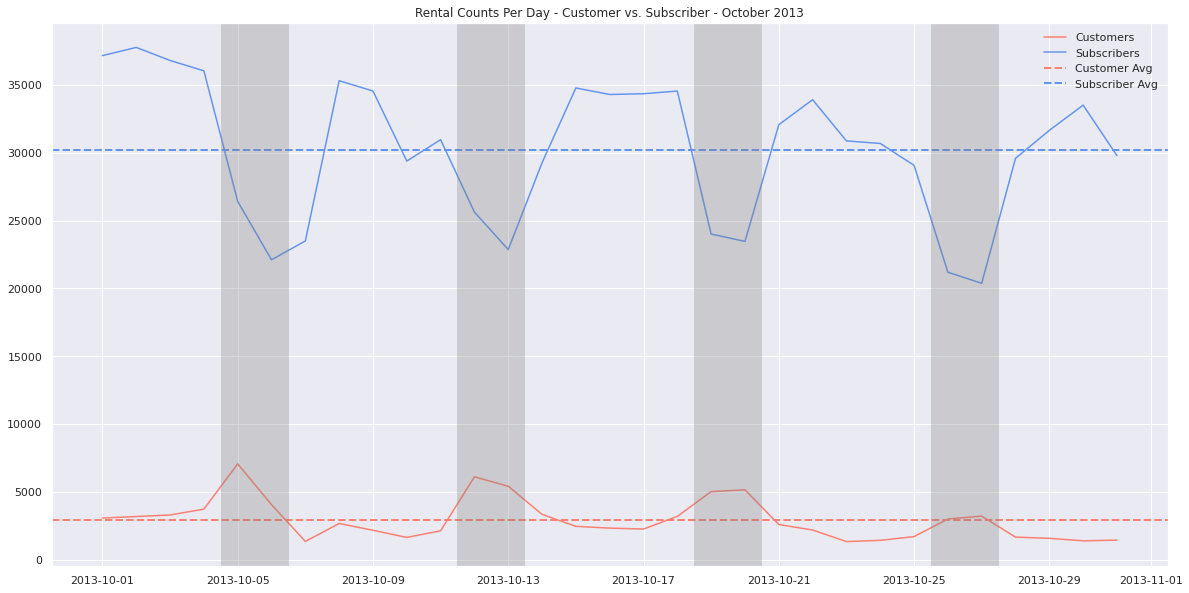

In [122]:
###TODO
# 1. Add xlim to remove the extra space on each side of the plot
# 2. Figure out how to label the weekend bars
# 3. Adjust labels on x-axis to show all 31 days

# Create a plot showing rental count per day over time for Customers vs. Subscribers
df['date'] = df['starttime'].dt.date
x = df.date.unique().tolist()

y_cus = df[df['usertype'] == 'Customer'].groupby(['date']).usertype.count()
y_sub = df[df['usertype'] == 'Subscriber'].groupby(['date']).usertype.count()
plt.figure(figsize=(20,10))
g = sns.lineplot(x, y_cus, color='salmon', label='Customers')
sns.lineplot(x, y_sub, color='cornflowerblue', label='Subscribers')

# Plot horizontal lines to show the average daily rental count for each group
plt.axhline(y_cus.mean(), color='salmon', linestyle='dashed', linewidth=2, label='Customer Avg')
plt.axhline(y_sub.mean(), color='cornflowerblue', linestyle='dashed', linewidth=2, label='Subscriber Avg')

# Create a list of weekend dates
dateList = df.starttime.dt.date.unique()
weekends = []
for date in dateList:
    if date.weekday() >= 5:
        weekends.append(date)

# Plot a vertical gray bar to designate weekend days
for date in weekends:
    plt.axvline(date, color='gray', alpha=0.3, linewidth=34)

# Add limits, labels and title
x_labels = [i+1 for i in range(31)]


# g.plt.xlim(TBD)
g.set(xlabel=None, ylabel=None,
      title='Rental Counts Per Day - Customer vs. Subscriber - October 2013');
plt.legend(loc='upper right');

In [104]:
import io
from floweaver import *
from ipysankeywidget import SankeyWidget
from ipywidgets import widgets
from IPython.display import display

In [112]:
# Generate a list of the top rental stations based on overall rental count
n = 10
top_stations_df = df.pivot_table(index=["start_station_name"], values="count",\
                  aggfunc=np.sum).sort_values("count", ascending=False).reset_index().head(n)
top_stations = top_stations_df['start_station_name'].to_list()

# Create a new df filtered down to the top n stations
temp_df = df[df.start_station_name.isin(top_stations)]

# Convert station ids to str type and create a new column for trip, concatenating start-end station ids
temp_df = temp_df.astype({'start_station_id': str, 'end_station_id': str})
temp_df['trip'] = temp_df[['start_station_id', 'end_station_id']].apply(lambda x: '-'.join(x), axis=1)

# From this data, create a df specific to generating the sankey diagram
sankey_df = temp_df.pivot_table(index=['start_station_name', 'end_station_name', 'trip'], values=['count'],\
                  aggfunc=np.sum).reset_index().sort_values("count", ascending=False).reset_index()
sankey_df = sankey_df.drop(columns=['index', 'trip'], axis=1)
cols = ['source', 'target', 'value']
sankey_df.columns = cols

In [109]:
# # Example of simple Sankey
# SankeyWidget(links=sankey_df.to_dict('records'))

In [124]:
# # Example of more complex Sankey
# size = dict(width=1000, height=2800)

# nodes = {
#     'start': ProcessGroup(sankey_df['source'].to_list()), 
#     'end': ProcessGroup(sankey_df['target'].to_list()), 
# }
# ordering = [
#     ['start'], 
#     ['end']
# ]

# bundles = [
#     Bundle('start', 'end')
# ]

# sdd = SankeyDefinition(nodes, bundles, ordering)

# start = Partition.Simple('process', sankey_df['source'].unique())
# end = Partition.Simple('process', 
#                                         sankey_df['target'].unique())

# # Update the ProcessGroup nodes to use the partitions
# nodes['start'].partition = start
# nodes['end'].partition = end


# weave(sdd, sankey_df).to_widget(**size).auto_save_png('sankey.png')

### Station Popularity - Map View

In [130]:
# Create new dfs for start and end station - coordinates and popularity
temp_df = df.pivot_table(index=["start_station_name", 'start_station_longitude', 'start_station_latitude'], values="count",\
                  aggfunc=np.sum).sort_values("count", ascending=False).reset_index()
temp_df2 = df.pivot_table(index=["end_station_name", 'end_station_longitude', 'end_station_latitude'], values="count",\
                  aggfunc=np.sum).sort_values("count", ascending=False).reset_index()

In [128]:
# Make an empty map
m = folium.Map(location=[40.73,-73.99], tiles='Stamen Toner', zoom_start=13)
 
# Add markers for start station popularity
for i in range(0,len(temp_df)):
    folium.Circle(
      location=[temp_df.iloc[i]['start_station_latitude'], temp_df.iloc[i]['start_station_longitude']],
      popup=temp_df.iloc[i]['start_station_name'],
      radius=float(temp_df.iloc[i]['count']/40), # can make this larger by adding a multiplier (e.g. * 10) 
      color='crimson',
      fill=True,
      fill_color='crimson').add_to(m)

# Show the map
m


In [129]:
# Make an empty map
m = folium.Map(location=[40.73,-73.99], tiles='Stamen Toner', zoom_start=13)

# add markers for end station popularity
for i in range(0,len(temp_df2)):
#     test.append(1)
    folium.Circle(
      location=[temp_df2.iloc[i]['end_station_latitude'], temp_df2.iloc[i]['end_station_longitude']],
      popup=temp_df2.iloc[i]['end_station_name'],
      radius=float(temp_df2.iloc[i]['count']/40), # can make this larger by adding a multiplier (e.g. * 10) 
      color='blue',
      fill=True,
      fill_color='blue').add_to(m)
    
m

In [131]:
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,usertype,birth_year,gender,tripduration_min,starthour,startdow,is_weekend,day,count,date
0,326,2013-10-01 00:01:08,2013-10-01 00:06:34,239,Willoughby St & Fleet St,40.69,-73.98,366,Clinton Ave & Myrtle Ave,40.69,...,Subscriber,1982,1,5,0,1,0,Tuesday,1,2013-10-01
1,729,2013-10-01 00:01:21,2013-10-01 00:13:30,322,Clinton St & Tillary St,40.70,-73.99,398,Atlantic Ave & Furman St,40.69,...,Customer,\N,0,12,0,1,0,Tuesday,1,2013-10-01
2,520,2013-10-01 00:01:24,2013-10-01 00:10:04,174,E 25 St & 1 Ave,40.74,-73.98,403,E 2 St & 2 Ave,40.73,...,Subscriber,1984,1,9,0,1,0,Tuesday,1,2013-10-01
3,281,2013-10-01 00:01:25,2013-10-01 00:06:06,430,York St & Jay St,40.70,-73.99,323,Lawrence St & Willoughby St,40.69,...,Subscriber,1985,1,5,0,1,0,Tuesday,1,2013-10-01
4,196,2013-10-01 00:01:27,2013-10-01 00:04:43,403,E 2 St & 2 Ave,40.73,-73.99,401,Allen St & Rivington St,40.72,...,Subscriber,1986,1,3,0,1,0,Tuesday,1,2013-10-01
